The geodata is provided by © OpenStreetMap contributors and is made available here under the Open Database License (ODbL).



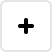
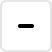
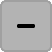
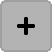
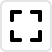
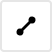
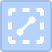
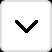
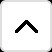
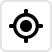

In [1]:
import pandas as pd

from lets_plot import *
from lets_plot.geo_data import *

LetsPlot.setup_html()

In [2]:
income_dat = pd.read_csv('https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/US_household_income_2017.csv', encoding='latin-1')
income_dat = income_dat[~income_dat["State_Name"].isin(["Alaska", "Hawaii", "Puerto Rico"])]
income_dat = income_dat[income_dat["Mean"] > 0]
income_dat.head(3)

id  State_Code State_Name State_ab          County        City  \
0  1011000           1    Alabama       AL   Mobile County   Chickasaw   
1  1011010           1    Alabama       AL  Barbour County  Louisville   
2  1011020           1    Alabama       AL   Shelby County  Columbiana   

             Place  Type Primary  Zip_Code Area_Code     ALand  AWater  \
0   Chickasaw city  City   place     36611       251  10894952  909156   
1        Clio city  City   place     36048       334  26070325   23254   
2  Columbiana city  City   place     35051       205  44835274  261034   

         Lat        Lon   Mean  Median  Stdev        sum_w  
0  30.771450 -88.079697  38773   30506  33101  1638.260513  
1  31.708516 -85.611039  37725   19528  43789   258.017685  
2  33.191452 -86.615618  54606   31930  57348   926.031000

In [3]:
# Create geocoder for the 48 contiguous states.
state_gcoder = geocode_states("US-48").inc_res()

In [4]:
# Compute a mean income by the US state.
mean_income_state = income_dat.groupby("State_Name", as_index=False)["Mean"].mean()

In [5]:
blank_theme = theme_classic() + theme(axis='blank') 

nice_view_options = dict(
    zoom=6, location=[-74.46, 41.57]
)

In [6]:
(ggplot() + 
    geom_livemap(**nice_view_options) + 
    geom_polygon(aes(fill="Mean"), data=mean_income_state,
                 map=state_gcoder, map_join="State_Name") +
    scale_fill_gradient(low="#fff5f0", high="#a50f15") +
    blank_theme
)

/Users/olarionova/miniconda3/lib/python3.7/site-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
/Users/olarionova/miniconda3/lib/python3.7/site-packages/geopandas/array.py:93: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  aout[:] = out


In [7]:
(ggplot() +
    geom_livemap(**nice_view_options) + 
    geom_bin2d(aes("Lon", "Lat"), data=income_dat, bins=[10,15], alpha=0.5) +
    scale_fill_gradient(low="#9ecae1", high="#08306b") +
    blank_theme
)

In [8]:
(    
ggplot() +
    geom_livemap(**nice_view_options) + 
    geom_polygon(aes(paint_a="Mean"), data=mean_income_state,
                 map=state_gcoder, map_join="State_Name",
                 fill_by="paint_a") +
    geom_bin2d(aes("Lon", "Lat", paint_b="..count.."), data=income_dat, 
               fill_by="paint_b", bins=[10,15], alpha=0.5) +
    scale_gradient("paint_a", low="#fff5f0", high="#a50f15") +
    scale_gradient("paint_b", low="#9ecae1", high="#08306b") +
    blank_theme
)